In [1]:
import csv
import numpy as np
from typing import Set,Tuple, List
import torch
import torch.utils
import torch.utils.data
import torch.nn as nn
import torchvision
NoneType = type(None)
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from PIL import Image
import torchvision.transforms.functional as TF
from torchvision.models import vgg11
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
import time


<h1 id="exercise-1"><strong>Exercise 1</strong></h1>


<font size="4px"><p>This method returns the fruit name by getting the string at a specific index of the set.</p>
<dl>
<dt>param fruit_id</dt>
<dd><p>The id of the fruit to get</p>
</dd>
<dt>param fruits</dt>
<dd><p>The set of fruits to choose the id from</p>
</dd>
<dt>return</dt>
<dd><p>The string corrosponding to the index <code>fruit_id</code></p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   It does not print the fruit at the correct index, why is the returned result wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue: name1, name3 and name4 are expected to correspond to the strings at the indices 1, 3, and 4: 'orange', 'kiwi' and 'strawberry'..</p>
</font>

In [85]:
# You can copy this code to your personal pipeline project or execute it here.
def id_to_fruit(fruit_id: int, fruits: Set[str]) -> str:
    """
    This method returns the fruit name by getting the string at a specific index of the set.

    :param fruit_id: The id of the fruit to get
    :param fruits: The set of fruits to choose the id from
    :return: The string corrosponding to the index ``fruit_id``

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   It does not print the fruit at the correct index, why is the returned result wrong?``
    | ``2   How could this be fixed?``

    This example demonstrates the issue:
    name1, name3 and name4 are expected to correspond to the strings at the indices 1, 3, and 4:
    'orange', 'kiwi' and 'strawberry'..

    >>> name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
    >>> name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
    >>> name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})
    """
    idx = 0
    for fruit in fruits:
        if fruit_id == idx:
            return fruit
        idx += 1
    raise RuntimeError(f"Fruit with id {fruit_id} does not exist")



In [ ]:
name1 = id_to_fruit(1, {"apple", "orange", "melon", "kiwi", "strawberry"})
name3 = id_to_fruit(3, {"apple", "orange", "melon", "kiwi", "strawberry"})
name4 = id_to_fruit(4, {"apple", "orange", "melon", "kiwi", "strawberry"})

name1, name3, name4

('orange', 'melon', 'apple')

In [ ]:
#changing the set to a list
# 1. this code does not show the expected result of the index as these sets are unordered.
# 2. Therefore we have to use this as a list. 
name1 = id_to_fruit(1, ["apple", "orange", "melon", "kiwi", "strawberry"]) #
name3 = id_to_fruit(3, ["apple", "orange", "melon", "kiwi", "strawberry"])
name4 = id_to_fruit(4, ["apple", "orange", "melon", "kiwi", "strawberry"])

#To display output
name1, name3, name4


('orange', 'kiwi', 'strawberry')

<h1 id="exercise-2"><strong>Exercise 2</strong></h1>


<font size="4px"><p>This method will flip the x and y coordinates in the coords array.</p>
<dl>
<dt>param coords</dt>
<dd><p>A numpy array of bounding box coordinates with shape [n,5] in format: :</p>
<pre><code>[[x11, y11, x12, y12, classid1],
 [x21, y21, x22, y22, classid2],
 ...
 [xn1, yn1, xn2, yn2, classid3]]</code></pre>
</dd>
<dt>return</dt>
<dd><p>The new numpy array where the x and y coordinates are flipped.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   Can you spot the obvious error?</code><br />
<code>2   After fixing the obvious error it is still wrong, how can this be fixed?</code></div>
</font>

<font size="4px"><p>The example demonstrates the issue. The returned swapped_coords are expected to have swapped x and y coordinates in each of the rows.</p>
</font>

In [ ]:
# You can copy this code to your personal pipeline project or execute it here.
def swap(coords: np.ndarray):
    """
    This method will flip the x and y coordinates in the coords array.

    :param coords: A numpy array of bounding box coordinates with shape [n,5] in format:
        ::

            [[x11, y11, x12, y12, classid1],
             [x21, y21, x22, y22, classid2],
             ...
             [xn1, yn1, xn2, yn2, classid3]]

    :return: The new numpy array where the x and y coordinates are flipped.

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   Can you spot the obvious error?``
    | ``2   After fixing the obvious error it is still wrong, how can this be fixed?``

    >>> import numpy as np
    >>> coords = np.array([[10, 5, 15, 6, 0],
    ...                    [11, 3, 13, 6, 0],
    ...                    [5, 3, 13, 6, 1],
    ...                    [4, 4, 13, 6, 1],
    ...                    [6, 5, 13, 16, 1]])
    >>> swapped_coords = swap(coords)

    The example demonstrates the issue. The returned swapped_coords are expected to have swapped
    x and y coordinates in each of the rows.
    """
    coords[:, 0], coords[:, 1], coords[:, 2], coords[:, 3], = coords[:, 1], coords[:, 1], coords[:, 3], coords[:, 2]
    
    
    return coords



In [ ]:
# This is the fixed code of the function
# 1. Swap Xn1 and Yn1 and Xn2 and Yn2; this is the incorrect code (bug: unwanted ',' can be seen) The whole formula is wrong
# 2. This can be fixed updating the code as follows
def swap(coords: np.ndarray):
    coords[:, [0, 1]] = coords[:, [1, 0]]
    coords[:, [2, 3]] = coords[:, [3, 2]]
    return coords

In [158]:
import numpy as np
coords = np.array([[10, 5, 15, 6, 0],
                   [11, 3, 13, 6, 0],
                   [5, 3, 13, 6, 1],
                   [4, 4, 13, 6, 1],
                   [6, 5, 13, 16, 1]])
swapped_coords = swap(coords)
swapped_coords


array([[ 5, 10,  6, 15,  0],
       [ 3, 11,  6, 13,  0],
       [ 3,  5,  6, 13,  1],
       [ 4,  4,  6, 13,  1],
       [ 5,  6, 16, 13,  1]])

<h1 id="exercise-3"><strong>Exercise 3</strong></h1>


<font size="4px"><p>This code plots the precision-recall curve based on data from a .csv file, where precision is on the x-axis and recall is on the y-axis. It it not so important right now what precision and recall means.</p>
<dl>
<dt>param csv_file_path</dt>
<dd><p>The CSV file containing the data to plot.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<div class="line-block"><code>1   For some reason the plot is not showing correctly, can you find out what is going wrong?</code><br />
<code>2   How could this be fixed?</code></div>
<p>This example demonstrates the issue. It first generates some data in a csv file format and the plots it using the <code>plot_data</code> method. If you manually check the coordinates and then check the plot, they do not correspond.</p>
</font>

In [ ]:
# You can copy this code to your personal pipeline project or execute it here.
def plot_data(csv_file_path: str):
    """
    This code plots the precision-recall curve based on data from a .csv file,
    where precision is on the x-axis and recall is on the y-axis.
    It it not so important right now what precision and recall means.

    :param csv_file_path: The CSV file containing the data to plot.


    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    | ``1   For some reason the plot is not showing correctly, can you find out what is going wrong?``
    | ``2   How could this be fixed?``

    This example demonstrates the issue.
    It first generates some data in a csv file format and the plots it using the ``plot_data`` method.
    If you manually check the coordinates and then check the plot, they do not correspond.

    >>> f = open("data_file.csv", "w")
    >>> w = csv.writer(f)
    >>> _ = w.writerow(["precision", "recall"])
    >>> w.writerows([[0.013,0.951],
    ...              [0.376,0.851],
    ...              [0.441,0.839],
    ...              [0.570,0.758],
    ...              [0.635,0.674],
    ...              [0.721,0.604],
    ...              [0.837,0.531],
    ...              [0.860,0.453],
    ...              [0.962,0.348],
    ...              [0.982,0.273],
    ...              [1.0,0.0]])
    >>> f.close()
    >>> plot_data('data_file.csv')
    """
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append(row)
        results = np.stack(results)

    # plot precision-recall curve
    plt.plot(results[:, 1], results[:, 0])
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()



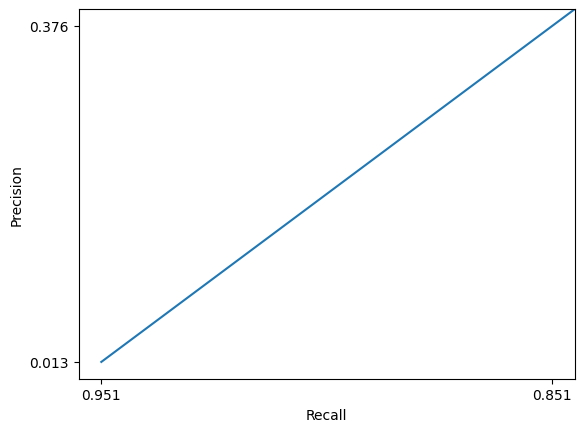

In [7]:
f = open("data_file.csv", "w")
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([[0.013,0.951],
             [0.376,0.851],
             [0.441,0.839],
             [0.570,0.758],
             [0.635,0.674],
             [0.721,0.604],
             [0.837,0.531],
             [0.860,0.453],
             [0.962,0.348],
             [0.982,0.273],
             [1.0,0.0]])
f.close()
plot_data('data_file.csv')


In [ ]:
# Fixed code.
# 1. Of a precision-recall curve  X-Axis = Precision & Y-Axis = Recall. We have to swap it here
# 2. The csv file was created with blank rows, this must be fixed
# 3. Values of csv files were converted into float values

def plot_data(csv_file_path: str):
    # load data
    results = []
    with open(csv_file_path) as result_csv:
        csv_reader = csv.reader(result_csv, delimiter=',')
        next(csv_reader)
        for row in csv_reader:
            results.append([float(val) for val in row]) # changed the code
        results = np.array(results) # made the result as an array


    # plot precision-recall curve
    plt.plot(results[:, 0], results[:, 1]) #swapped the x and y axis
    plt.ylim([-0.05, 1.05])
    plt.xlim([-0.05, 1.05])
    plt.xlabel('Precision') #swapped the x and y axis
    plt.ylabel('Recall') #swapped the x and y axis
    plt.title('Precision-Recall Curve')
    plt.grid(True) #newly added
    plt.show()

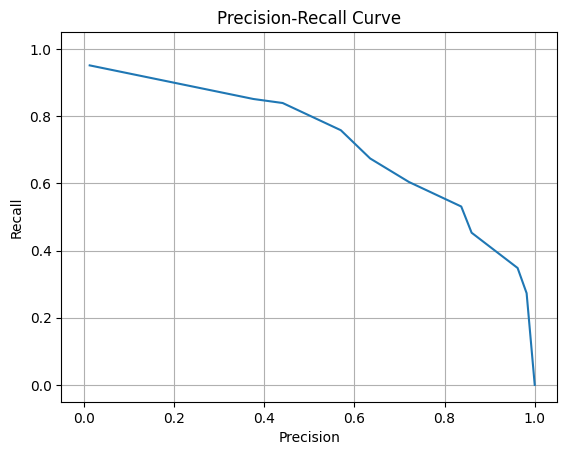

In [207]:
f = open("data_file.csv", "w", newline="")  # Add newline="" to prevent blank rows
w = csv.writer(f)
_ = w.writerow(["precision", "recall"])
w.writerows([
    [0.013, 0.951],
    [0.376, 0.851],
    [0.441, 0.839],
    [0.570, 0.758],
    [0.635, 0.674],
    [0.721, 0.604],
    [0.837, 0.531],
    [0.860, 0.453],
    [0.962, 0.348],
    [0.982, 0.273],
    [1.0, 0.0],
])
f.close()

plot_data('data_file.csv')

<h1 id="generator-for-exercise-4">** Generator (for Exercise 4)**</h1>


<font size="4px"><p>Generator class for the GAN</p>
</font>

In [208]:
# You can copy this code to your personal pipeline project or execute it here.
class Generator(nn.Module):
    """
    Generator class for the GAN
    """

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output



<h1 id="discriminator-for-exercise-4">** Discriminator (for Exercise 4)**</h1>


<font size="4px"><p>Discriminator class for the GAN</p>
</font>

In [209]:
# You can copy this code to your personal pipeline project or execute it here.
class Discriminator(nn.Module):
    """
    Discriminator class for the GAN
    """
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output



<h1 id="exercise-4">** Exercise 4**</h1>


<font size="4px"><p>The method trains a Generative Adversarial Network and is based on: <a href="https://realpython.com/generative-adversarial-networks/">https://realpython.com/generative-adversarial-networks/</a></p>
<p>The Generator network tries to generate convincing images of handwritten digits. The Discriminator needs to detect if the image was created by the Generater or if the image is a real image from a known dataset (MNIST). If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult to distinguish from real images. This is goal of a GAN.</p>
<p>This code produces the expected results at first attempt at about 50 epochs.</p>
<dl>
<dt>param batch_size</dt>
<dd><p>The number of images to train in one epoch.</p>
</dd>
<dt>param num_epochs</dt>
<dd><p>The number of epochs to train the gan.</p>
</dd>
<dt>param device</dt>
<dd><p>The computing device to use. If CUDA is installed and working then <span class="title-ref">cuda:0</span> is chosen otherwise 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.</p>
</dd>
</dl>
<p><strong>This method is part of a series of debugging exercises.</strong> <strong>Each Python method of this series contains bug that needs to be found.</strong></p>
<p>It contains at least two bugs: one structural bug and one cosmetic bug. Both bugs are from the original tutorial.</p>
<div class="line-block"><code>1   Changing the batch_size from 32 to 64 triggers the structural bug.</code><br />
<code>2   Can you also spot the cosmetic bug?</code><br />
<code>Note: to fix this bug a thorough understanding of GANs is not necessary.</code></div>
<p>Change the batch size to 64 to trigger the bug with message: ValueError: "Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size."</p>
</font>

In [10]:
# You can copy this code to your personal pipeline project or execute it here.
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):
    """
    The method trains a Generative Adversarial Network and is based on:
    https://realpython.com/generative-adversarial-networks/

    The Generator network tries to generate convincing images of handwritten digits.
    The Discriminator needs to detect if the image was created by the Generater or if the image is a real image from
    a known dataset (MNIST).
    If both the Generator and the Discriminator are optimized, the Generator is able to create images that are difficult
    to distinguish from real images. This is goal of a GAN.

    This code produces the expected results at first attempt at about 50 epochs.

    :param batch_size: The number of images to train in one epoch.
    :param num_epochs: The number of epochs to train the gan.
    :param device: The computing device to use. If CUDA is installed and working then `cuda:0` is chosen
        otherwise 'cpu' is chosen. Note: Training a GAN on the CPU is very slow.

    **This method is part of a series of debugging exercises.**
    **Each Python method of this series contains bug that needs to be found.**

    It contains at least two bugs: one structural bug and one cosmetic bug. Both bugs are from the original tutorial.

    | ``1   Changing the batch_size from 32 to 64 triggers the structural bug.``
    | ``2   Can you also spot the cosmetic bug?``
    | ``Note: to fix this bug a thorough understanding of GANs is not necessary.``

    Change the batch size to 64 to trigger the bug with message:
    ValueError: "Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size."

    >>> train_gan(batch_size=32, num_epochs=100)
    """
    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated
            if n == batch_size - 1:
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)



Codes to run copy

In [ ]:
# You can copy this code to your personal pipeline project or execute it here.
# 1. If Batch_Size = 64, we can see the error. This can happen because of the difference of the input size and the target size
# 2. Cosmetic Bug happenes becase of a spelling mistakes or code location mismatch. 
def train_gan(batch_size: int = 32, num_epochs: int = 100, device: str = "cuda:0" if torch.cuda.is_available() else "cpu"):

    # Add/adjust code.

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    try:
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    except:
        print("Failed to download MNIST, retrying with different URL")
        # see: https://github.com/pytorch/vision/blob/master/torchvision/datasets/mnist.py
        torchvision.datasets.MNIST.resources = [
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
             'f68b3c2dcbeaaa9fbdd348bbdeb94873'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
             'd53e105ee54ea40749a09fcbcd1e9432'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz',
             '9fb629c4189551a2d022fa330f9573f3'),
            ('https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',
             'ec29112dd5afa0611ce80d1b7f02629c')
        ]
        train_set = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)

    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

    # example data
    real_samples, mnist_labels = next(iter(train_loader))

    fig = plt.figure()
    for i in range(16):
        sub = fig.add_subplot(4, 4, 1 + i)
        sub.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
        sub.axis('off')

    fig.tight_layout()
    fig.suptitle("Real images")
    display(fig)

    time.sleep(5)

    # Set up training
    discriminator = Discriminator().to(device)
    generator = Generator().to(device)
    lr = 0.0001
    loss_function = nn.BCELoss()
    optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
    optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

    # train
    for epoch in range(num_epochs):
        for n, (real_samples, mnist_labels) in enumerate(train_loader):

            # Data for training the discriminator
            real_samples = real_samples.to(device=device)
            real_samples_labels = torch.ones((batch_size, 1)).to(device=device)
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
            generated_samples = generator(latent_space_samples)
            generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
            all_samples = torch.cat((real_samples, generated_samples))
            all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

            # Training the discriminator
            discriminator.zero_grad()
            output_discriminator = discriminator(all_samples)
            loss_discriminator = loss_function(output_discriminator, all_samples_labels)
            loss_discriminator.backward()
            optimizer_discriminator.step()

            # Data for training the generator
            latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

            # Training the generator
            generator.zero_grad()
            generated_samples = generator(latent_space_samples)
            output_discriminator_generated = discriminator(generated_samples)
            loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
            loss_generator.backward()
            optimizer_generator.step()

            # Show loss and samples generated 
            if n == batch_size - 1:
                name = f"Generate images\n Epoch: {epoch} Loss D.: {loss_discriminator:.2f} Loss G.: {loss_generator:.2f}"
                generated_samples = generated_samples.detach().cpu().numpy()
                fig = plt.figure()
                for i in range(16):
                    sub = fig.add_subplot(4, 4, 1 + i)
                    sub.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
                    sub.axis('off')
                fig.suptitle(name)
                fig.tight_layout()
                clear_output(wait=False)
                display(fig)



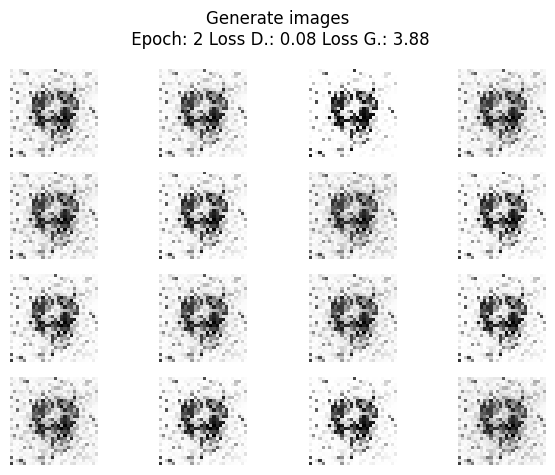

KeyboardInterrupt: 

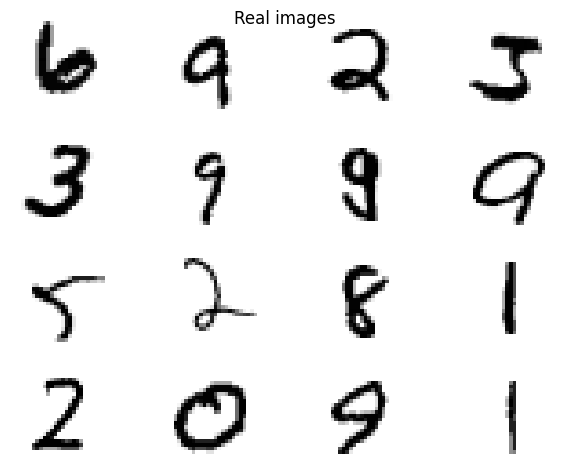

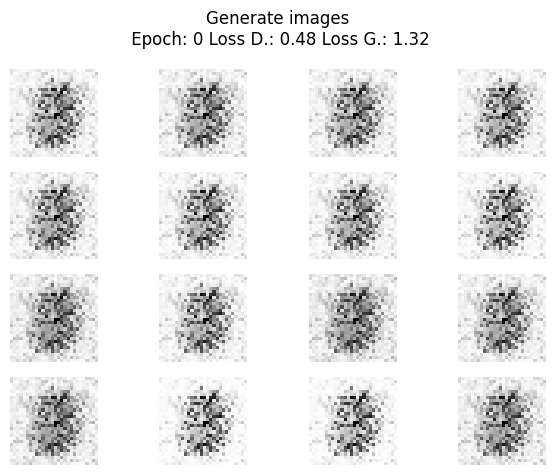

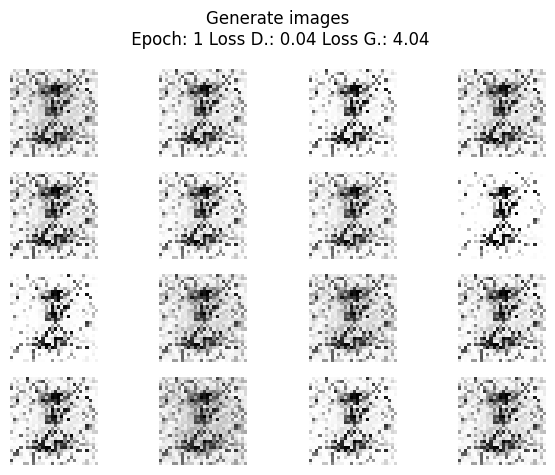

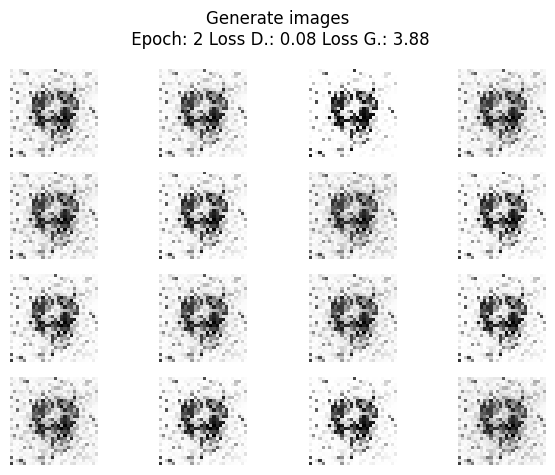

In [215]:
train_gan(batch_size=32, num_epochs=100)

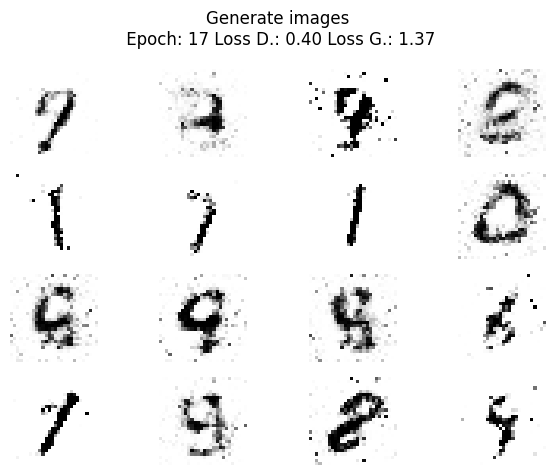

In [ ]:
train_gan(batch_size=32, num_epochs=100)
